<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/Week10/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SMOTE(Synthetic Miniority Oversampling Technique)**
### **[imbalanced data-learn](https://imbalanced-learn.org/stable/index.html)**

<img src ='https://imghub.insilicogen.com/media/photos/%EC%96%B8%EB%8D%94%EC%83%98%ED%94%8C%EB%A7%81%EA%B3%BC_%EC%98%A4%EB%B2%84%EC%83%98%ED%94%8C%EB%A7%81_P3B5KVU.png'>

<img src='https://iq.opengenus.org/content/images/2019/09/COVER-1.PNG'>

### **SMOTE for Imbalanced Dataset**

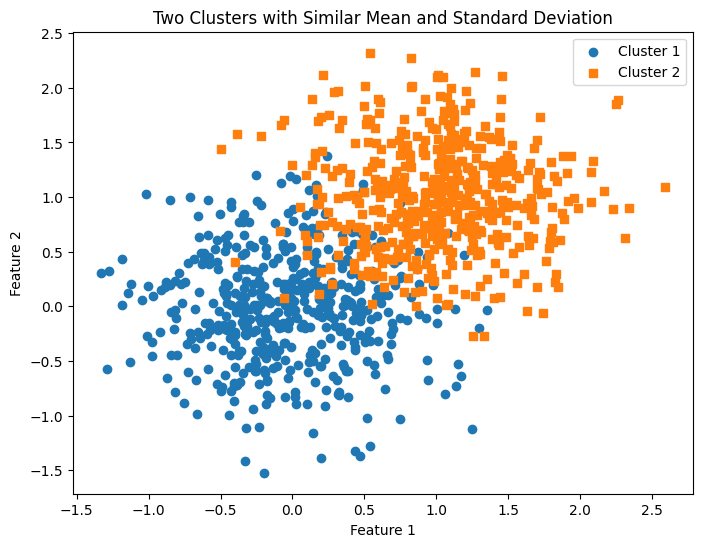

In [ ]:
# prompt: 사이킷런을 사용하여 각각 500개씩 비슷한 평균과 편차를 가진 2개군을 형성하는 데이터를 만들고 시각화

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# 두 개의 군집 생성 (각 500개의 데이터)
X, y = make_blobs(n_samples=[500, 500], centers=[[0, 0], [1, 1]], cluster_std=0.5, random_state=0)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Cluster 1', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Cluster 2', marker='s')
plt.title('Two Clusters with Similar Mean and Standard Deviation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


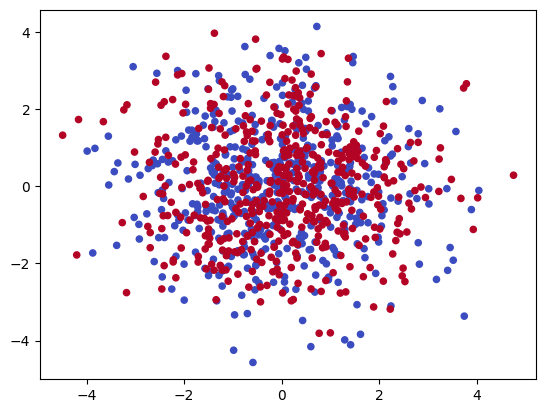

In [ ]:
plt.rcParams['figure.figsize'] = (6.4, 4.8)
from sklearn.datasets import make_blobs
n_samples_1 = 500; n_samples_2 = 500
centers = [[0.0, 0.0], [0.0, 0.0]]; clusters_std = [1.5, 1.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers,
                  cluster_std=clusters_std, random_state=0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

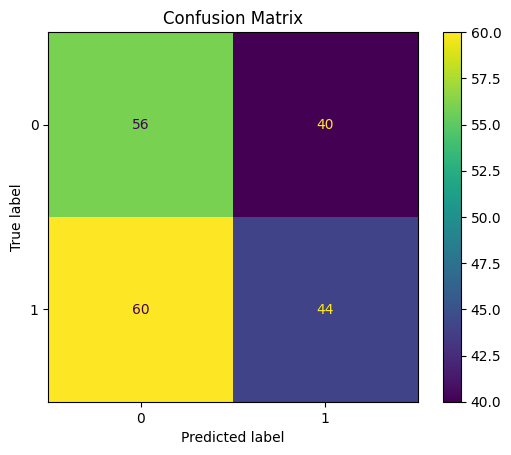

              precision    recall  f1-score   support

           0       0.48      0.58      0.53        96
           1       0.52      0.42      0.47       104

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



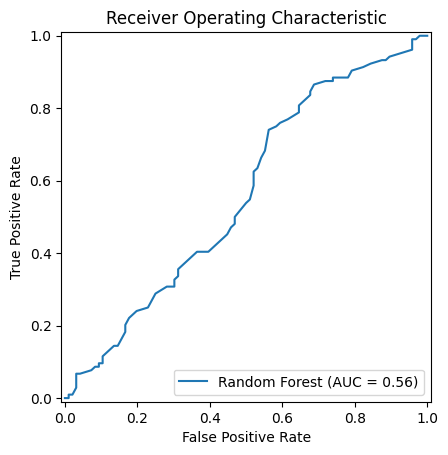

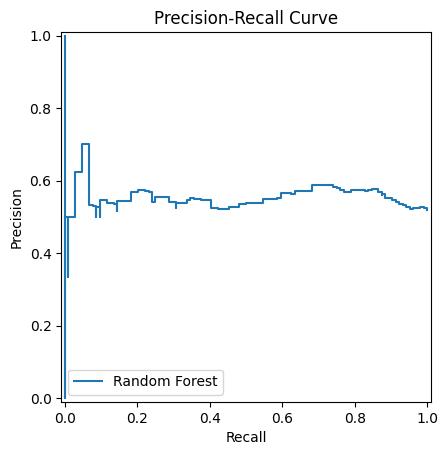

In [ ]:
# prompt: 랜덤포레스트로 예측하고 confusion matrix, classification report, AUROC, PR  curve를 시각화해줘

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve # This line is causing the error
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay # Import the correct classes instead


# Generate imbalanced data (example)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Change to use ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# Classification Report
print(classification_report(y_test, y_pred))


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Change to use RocCurveDisplay
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
disp.plot()
plt.title('Receiver Operating Characteristic')
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Change to use PrecisionRecallDisplay
disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Random Forest')
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# prompt: randomforest로 예측
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

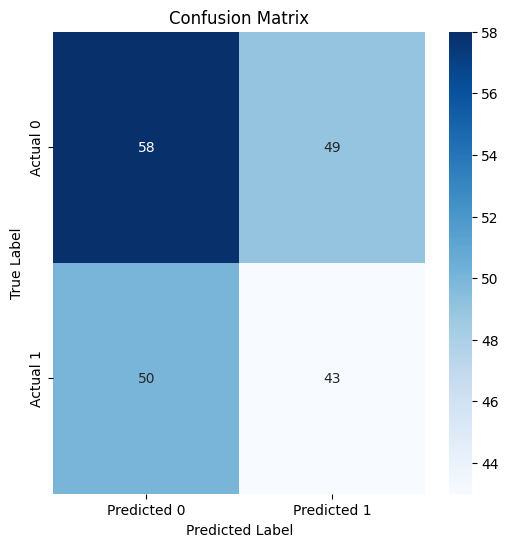

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# prompt: classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.54      0.54      0.54       107
           1       0.47      0.46      0.46        93

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



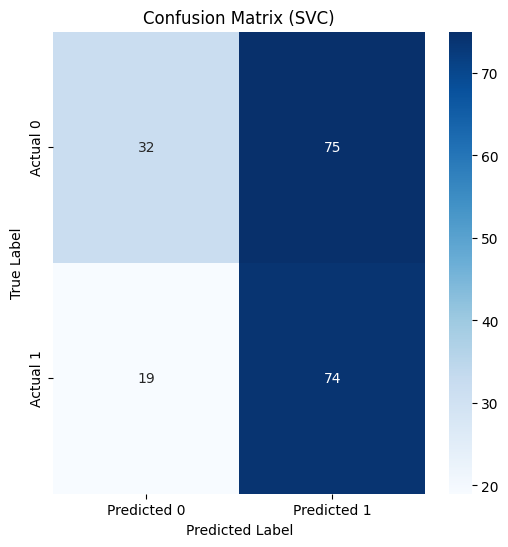

In [ ]:
# prompt: SVC RBF로 예측하기

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# ... (previous code) ...

# Initialize the SVC model with an RBF kernel
svc_model = SVC(kernel='rbf', random_state=0, probability=True) # probability=True for predict_proba

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

# Train the SVC model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_predict_svc = svc_model.predict(X_test)
y_scores_svc = svc_model.predict_proba(X_test)


# Create and display the confusion matrix for the SVC model
cm_svc = confusion_matrix(y_test, y_predict_svc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVC)")
plt.show()


In [ ]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       107
           1       0.50      0.80      0.61        93

    accuracy                           0.53       200
   macro avg       0.56      0.55      0.51       200
weighted avg       0.57      0.53      0.50       200



In [ ]:
model

RandomForestClassifier(random_state=0)

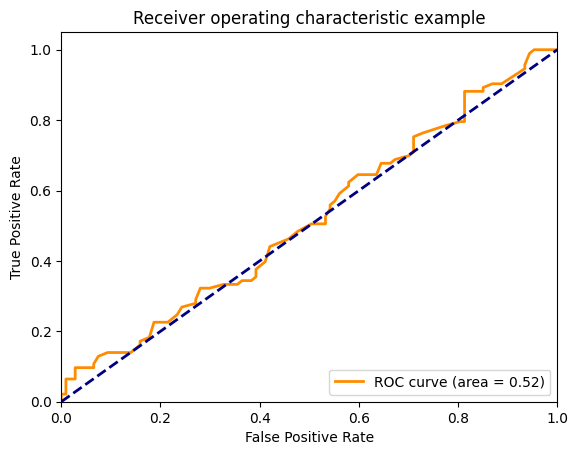

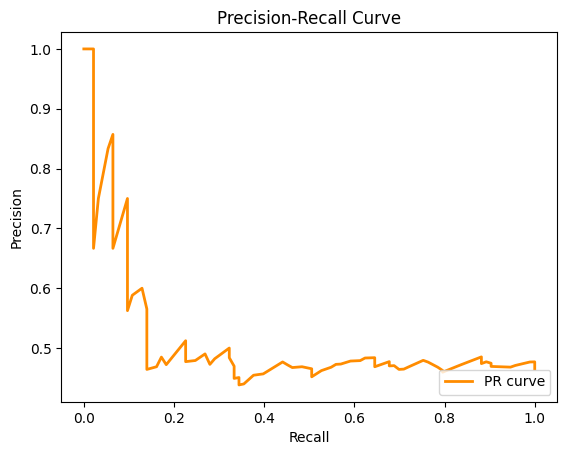

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have your model, X_test, and y_test defined

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

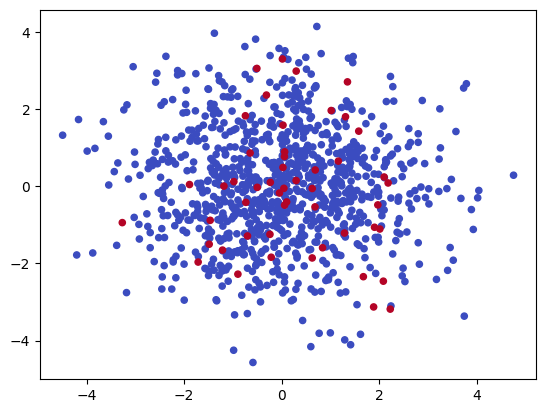

In [ ]:
plt.rcParams['figure.figsize'] = (6.4, 4.8)
from sklearn.datasets import make_blobs
n_samples_1 = 950; n_samples_2 = 50
centers = [[0.0, 0.0], [0.0, 0.0]]; clusters_std = [1.5, 1.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers,
                  cluster_std=clusters_std, random_state=0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

In [ ]:

model = RandomForestClassifier(random_state=0) # 알고리즘

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1024)

model.fit(X_train, y_train)  # 데이터 + 알고리즘 = 모델

y_predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

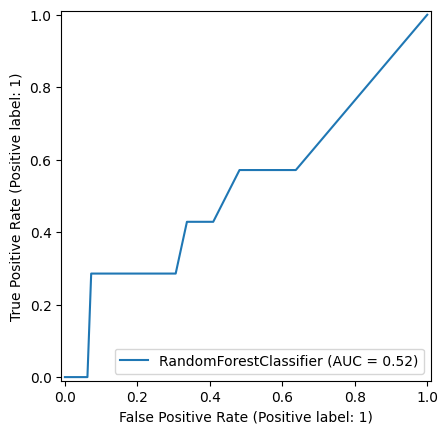

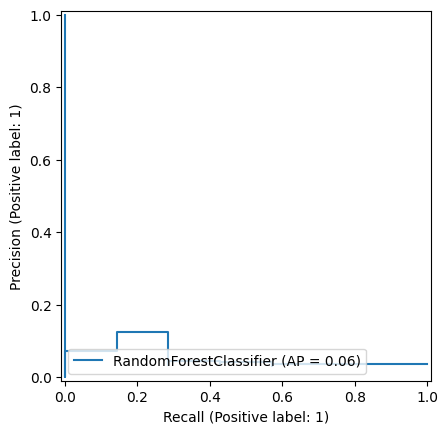

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       193
           1       0.00      0.00      0.00         7

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.93      0.96      0.95       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report

# For ROC curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# For Precision-Recall curve
pr_display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Print classification report
print(classification_report(y_test, y_predict))

In [ ]:
tn = data.iloc[0,0]; fp=data.iloc[0,1]
fn = data.iloc[1,0]; tp=data.iloc[1,1]
fpr = fp/data.iloc[0,2]; tpr = tp/data.iloc[1,2]
print(f'알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 {fpr*100} %')
print(f'알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 {tpr*100} %')

NameError: name 'data' is not defined

In [ ]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
Counter(y_train)

### **방법 1 . 불균형데이터 처리 방법**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
kf = KFold(n_splits=5)
lgr = LogisticRegression(class_weight='balanced', random_state=11)
params = [{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}]
grid = GridSearchCV(lgr, param_grid=params, cv=kf, scoring = 'recall_macro')

In [ ]:
y_predict = grid.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

### **방법 2 . 불균형데이터 처리 방법**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=10)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

X_train.shape, X_train_smote.shape
Counter(y_train), Counter(y_train_smote)

In [ ]:
X_train, y_train = X_train_smote, y_train_smote
X_train.shape, y_train.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
classifiers = {}
classifiers.update({'LGR': LogisticRegression(random_state=11, solver ='liblinear')})
classifiers.update({'SVC': SVC(random_state=11, max_iter=300, probability=True)})
classifiers.update({'Decisiontree': DecisionTreeClassifier()})
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers.update({'Ridge': RidgeClassifier()})
classifiers.update({'Extra Trees': ExtraTreeClassifier()})

classifiers

In [ ]:
DECISION_FUNCTIONS = {'SVC', 'Ridge'}

In [ ]:
parameters = {}
parameters.update({'LGR':
{
'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']}
})

In [ ]:
parameters.update({'SVC':
{
'classifier__kernel': ['linear', 'rbf', 'poly'],
'classifier__gamma': ['auto'],
'classifier__C': [0.1, 0.5, 1, 5, 10, 50, 100],
'classifier__degree': [1, 2, 3, 4, 5, 6]
}})

In [ ]:
parameters.update({'Decisiontree':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [ ]:
parameters.update({'Random Forest':
{
'classifier__n_estimators': [200],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [ ]:
parameters.update({'Gradient Boosting':
{
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [ ]:
parameters.update({'Ridge':
{
'classifier__alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
}})

In [ ]:
parameters.update({'Extra Trees':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 데이터 로딩
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# 알고리즘과 파라미터 정의
models_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": np.logspace(-3, 3, 10),
            "penalty": ["l2"],
            "solver": ["lbfgs", "liblinear"],
        },
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5],
        },
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5],
        },
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": list(range(3, 11)),
            "weights": ["uniform", "distance"],
            "p": [1, 2],
        },
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"],
        },
    },
}

# 결과 저장용 리스트
results = []

# 반복 실행
for name, mp in models_params.items():
    clf = RandomizedSearchCV(mp["model"], mp["params"], n_iter=10, scoring="f1", cv=3, random_state=42)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)

    results.append({
        "Model": name,
        "Best Params": clf.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    })

# 결과 데이터프레임
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

df_results


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Model,Best Params,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 6}",0.976608,0.981481,0.981481,0.981481
1,SVC,"{'kernel': 'linear', 'gamma': 'auto', 'C': 10}",0.970760,0.981308,0.972222,0.976744
2,RandomForestClassifier,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.964912,0.963636,0.981481,0.972477
3,GradientBoostingClassifier,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.959064,0.963303,0.972222,0.967742
4,LogisticRegression,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000.0}",0.959064,0.971963,0.962963,0.967442


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import randint, loguniform
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. 불균형 데이터 생성 (소수 클래스 비율 < 5%)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.96, 0.04], flip_y=0, random_state=42)

print("Before SMOTE:", np.bincount(y))  # 소수 클래스 분포 확인

# 2. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. 분류기별 파라미터 분포 정의
models_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "model__C": loguniform(1e-3, 1e3),
            "model__penalty": ["l2"],
            "model__solver": ["lbfgs", "liblinear"]
        },
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "model__n_estimators": randint(50, 150),
            "model__max_depth": randint(3, 20),
            "model__min_samples_split": randint(2, 10)
        },
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "model__n_estimators": randint(50, 150),
            "model__learning_rate": loguniform(0.01, 0.3),
            "model__max_depth": randint(3, 10)
        },
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": randint(3, 15),
            "model__weights": ["uniform", "distance"],
            "model__p": randint(1, 3)
        },
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "model__C": loguniform(0.1, 100),
            "model__kernel": ["linear", "rbf"],
            "model__gamma": ["scale", "auto"]
        },
    },
}

# # 4. 결과 저장
# results = []

# # 5. 반복 학습 + 평가
# for name, mp in models_params.items():
#     pipe = Pipeline([
#         ("smote", SMOTE(random_state=42)),
#         ("model", mp["model"])
#     ])
#     clf = RandomizedSearchCV(pipe, mp["params"], n_iter=20, cv=3, scoring="f1", random_state=42, n_jobs=-1)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)

#     results.append({
#         "Model": name,
#         "Best Params": clf.best_params_,
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred),
#         "Recall": recall_score(y_test, y_pred),
#         "F1 Score": f1_score(y_test, y_pred)
#     })

# # 6. 결과 데이터프레임
# df_results = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
# df_results


Before SMOTE: [960  40]


In [ ]:
for name, mp in models_params.items():
    print(name)
    print(mp)
    print(mp["model"])
    print(mp["params"])
    print('*'*100)

LogisticRegression
{'model': LogisticRegression(max_iter=1000), 'params': {'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7eb5381d4d50>, 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}}
LogisticRegression(max_iter=1000)
{'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7eb5381d4d50>, 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}
****************************************************************************************************
RandomForestClassifier
{'model': RandomForestClassifier(), 'params': {'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb5302a3c10>, 'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb5302a3910>, 'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb5302b8390>}}
RandomForestClassifier()
{'model__n_estimators': <scipy.stats._distn_infrastruc

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, recall_score, log_loss, brier_score_loss

In [ ]:
results = {}
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    print(classifier_label)
    steps = [('scaler', StandardScaler()), ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]

    gs = RandomizedSearchCV(pipeline, param_grid, cv = 2,  n_iter = 2,
                            scoring = 'recall_macro')


    y_pred = gs.fit(X_train, y_train).predict(X_test)

    if classifier_label in DECISION_FUNCTIONS:
        y_proba = gs.decision_function(X_test)
        ap = average_precision_score(y_test, y_proba)
    else:
        y_proba = gs.predict_proba(X_test)[:,1]
        ap = average_precision_score(y_test, y_proba)


    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'AUROC': roc_auc_score(y_test, y_proba),
              'Average PR': ap,
              'F1-score': f1_score(y_test, y_pred),
              'CV accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
             }

    results.update({classifier_label: result})
    dump(gs.fit(X_train, y_train), 'smote_%s.joblib'%classifier_label)

In [ ]:
pd.DataFrame(results).T.sort_values(by = 'F1-score', ascending=False)

In [ ]:
import glob
glob.glob('sm*.joblib')

In [ ]:
lgr = load('smote_LGR.joblib')
y_predict = lgr.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(random_state=13,
                                                     class_weight='balanced'))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

In [ ]:
imba_pipeline

In [ ]:
param = {
'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
'randomforestclassifier__max_depth': [int(x) for x in np.linspace(5, 20, 10)],
'randomforestclassifier__min_samples_split': [2, 5, 10],
'randomforestclassifier__min_samples_leaf': [1, 2, 4],
}

In [ ]:
rs = RandomizedSearchCV(imba_pipeline, param, cv=kf,  n_iter=50,
                        scoring='recall_macro')
y_predict = rs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

### **Naive Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

In [ ]:
# prompt: 훈련과 검증데이터 구분

from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # 80% train, 20% test
# You can adjust test_size and random_state as needed


In [ ]:
y_predict = grid.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

### **From random over-sampling to SMOTE and ADASYN**

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_smote = LogisticRegression().fit(X_resampled, y_resampled)

y_predict = clf_smote.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

In [ ]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)

y_predict = clf_adasyn.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))